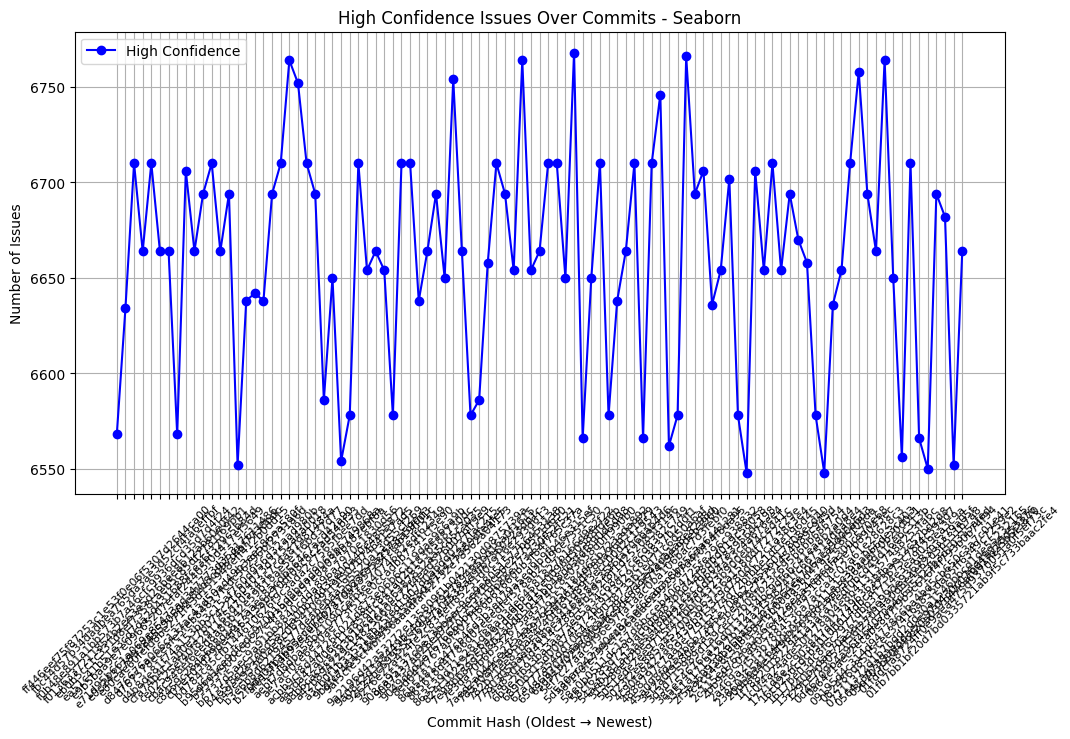

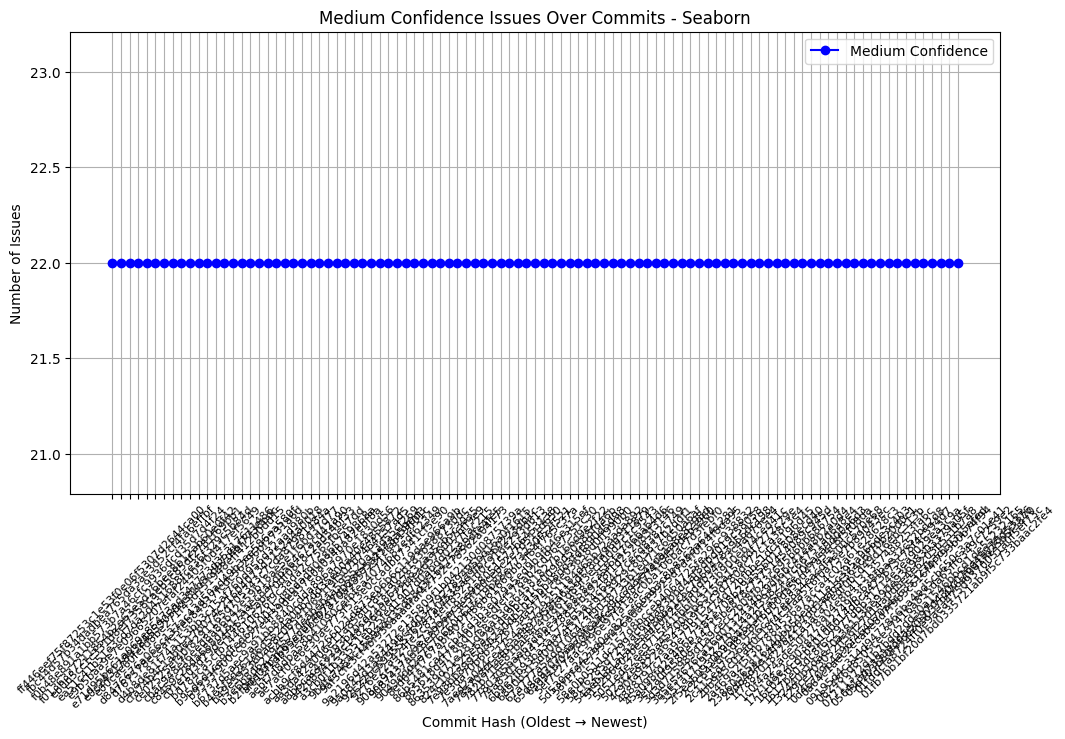

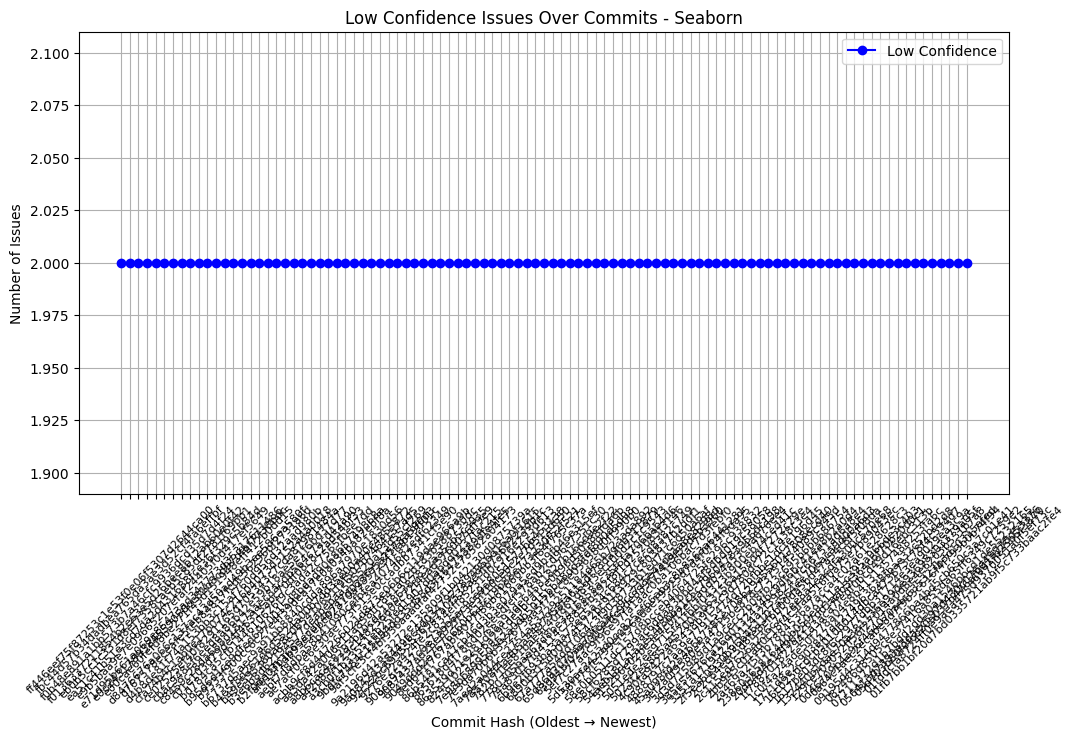

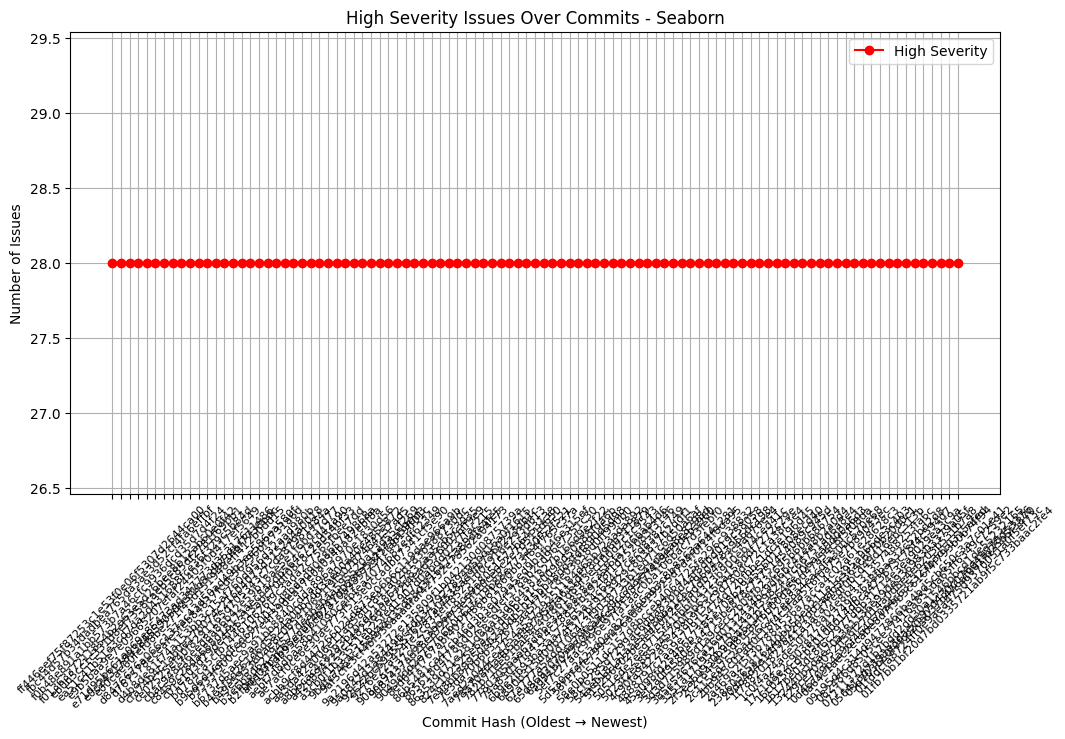

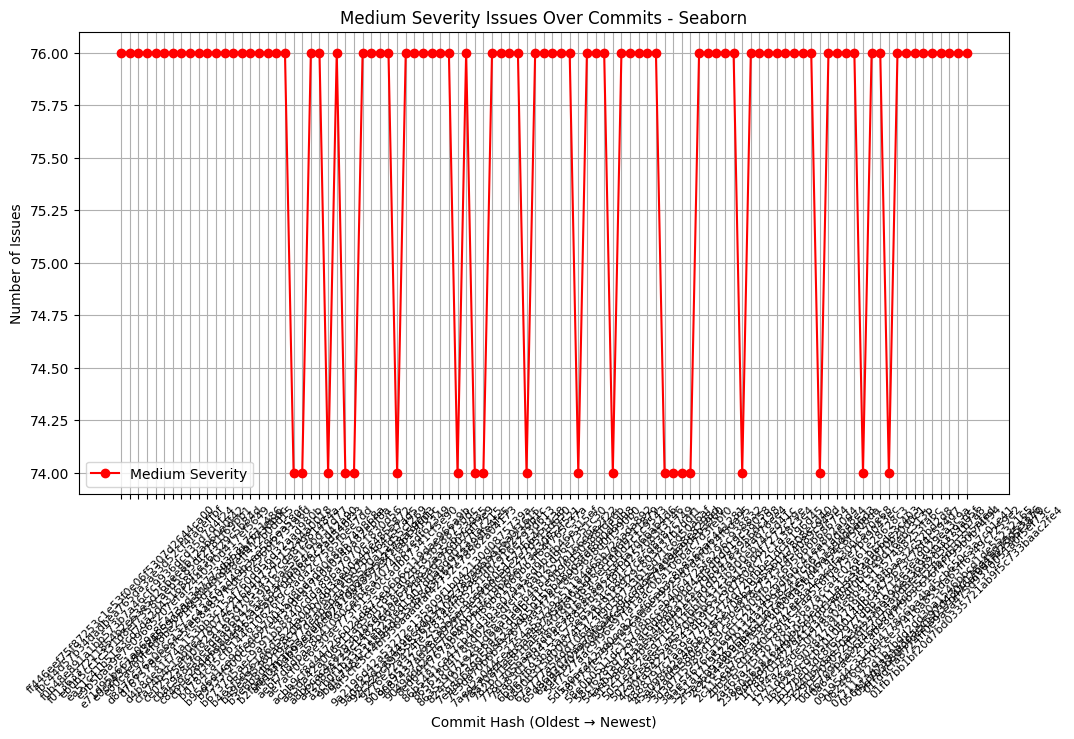

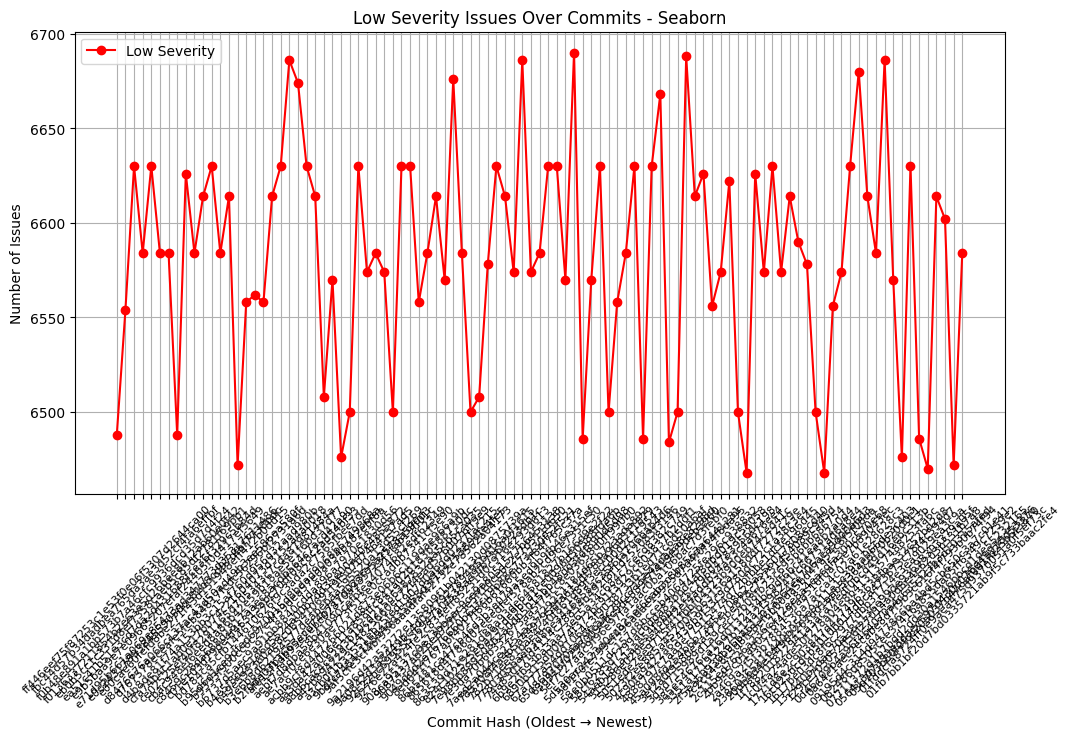

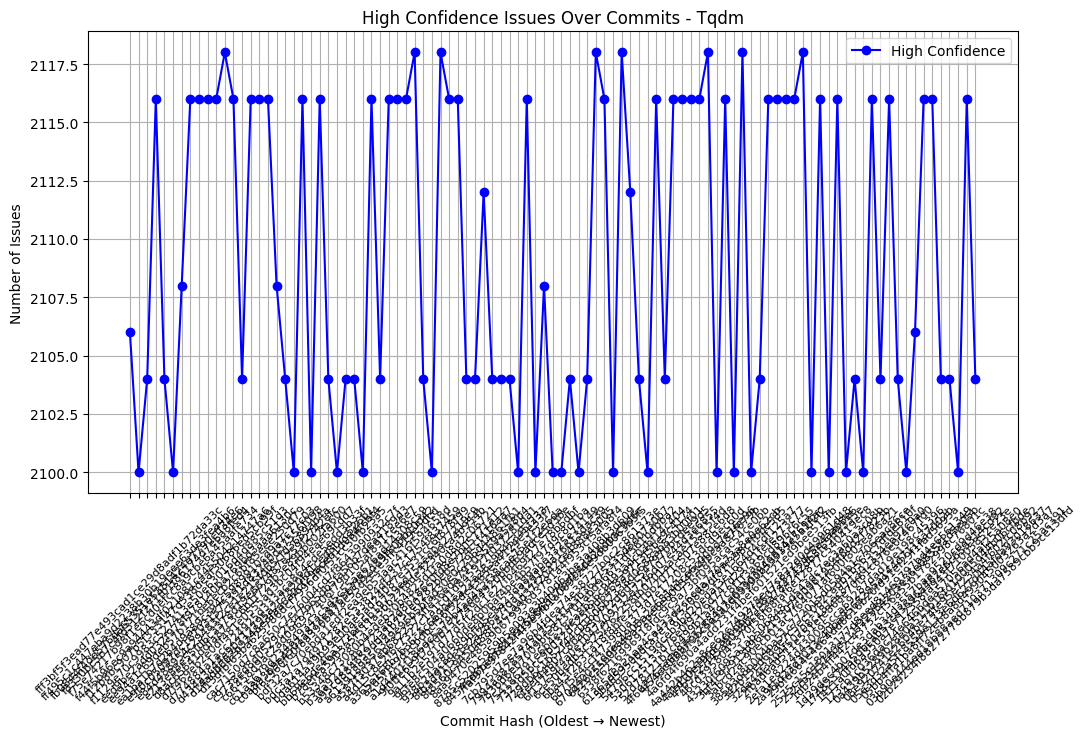

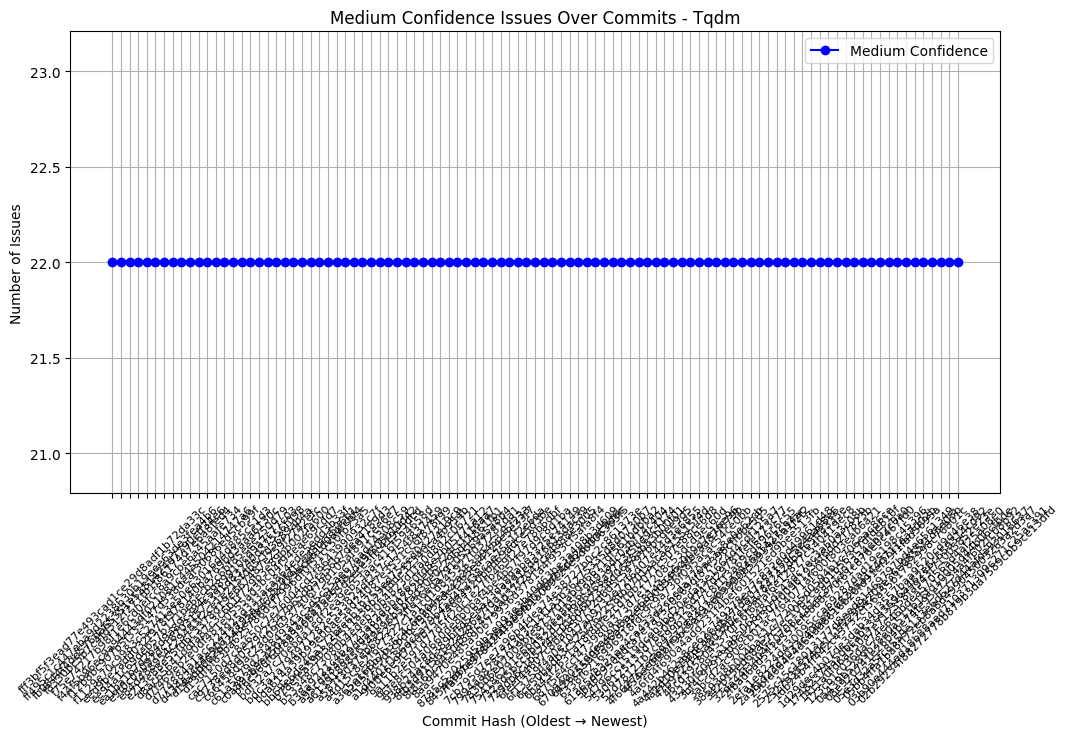

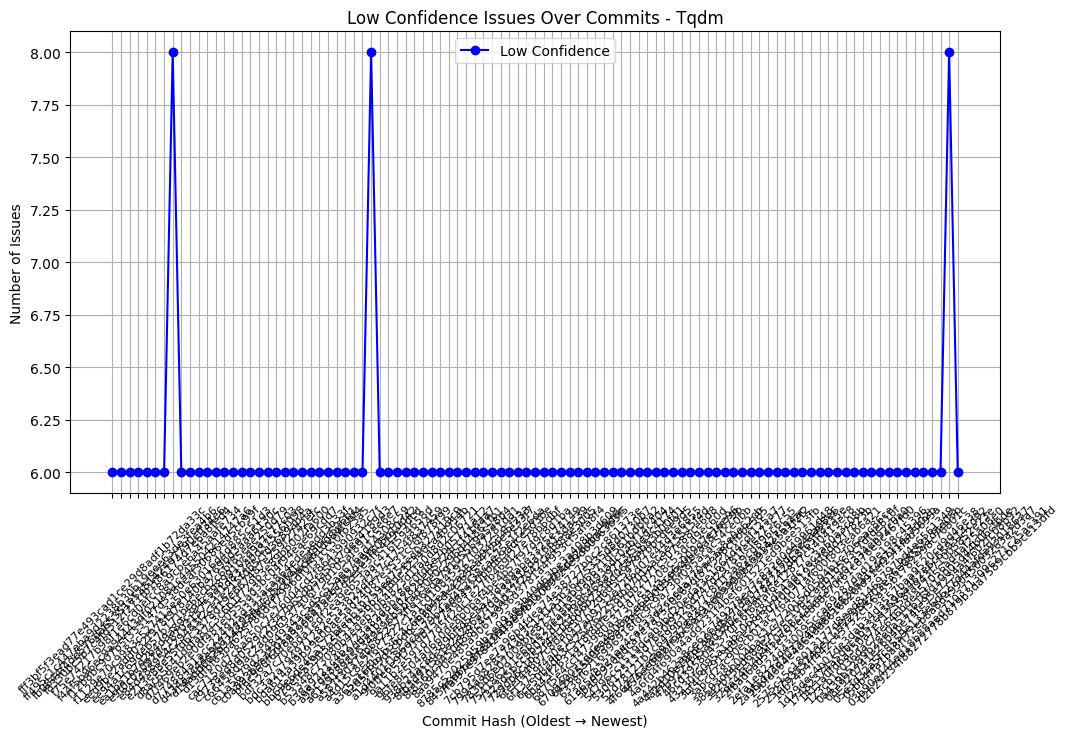

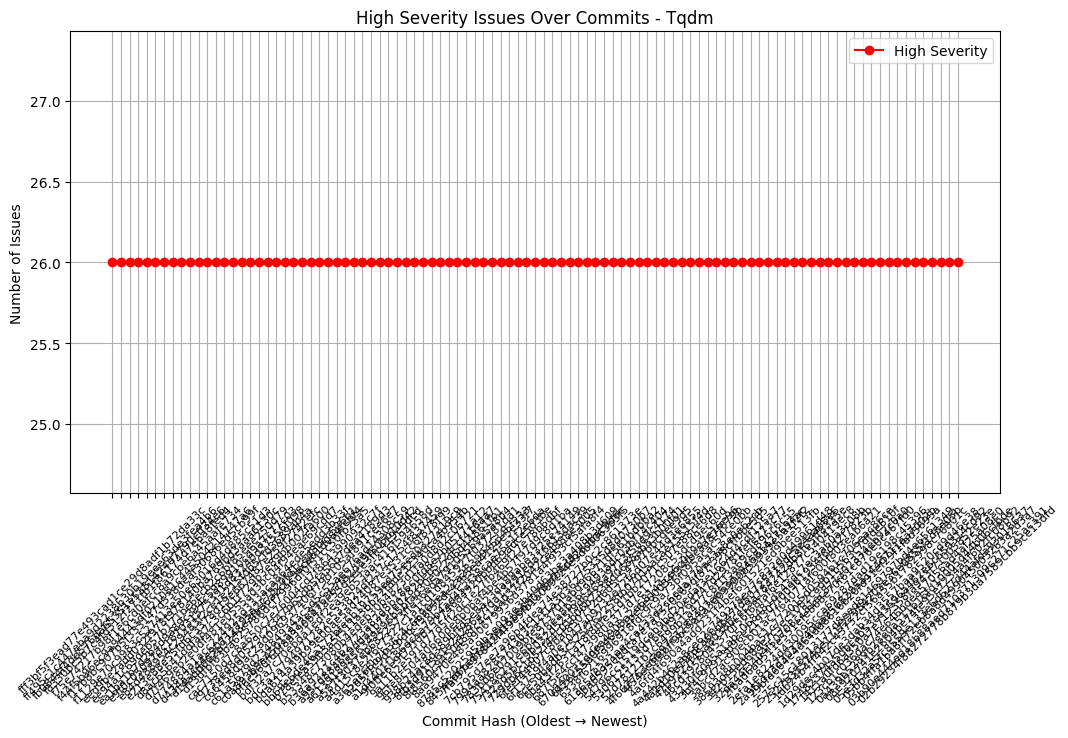

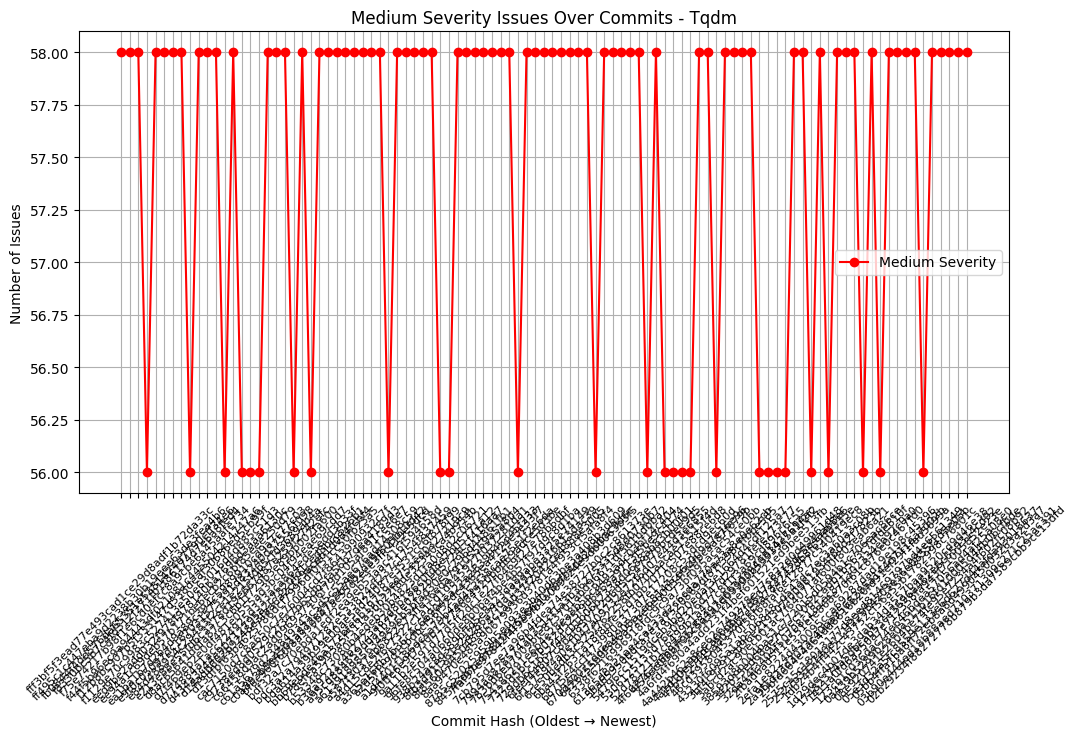

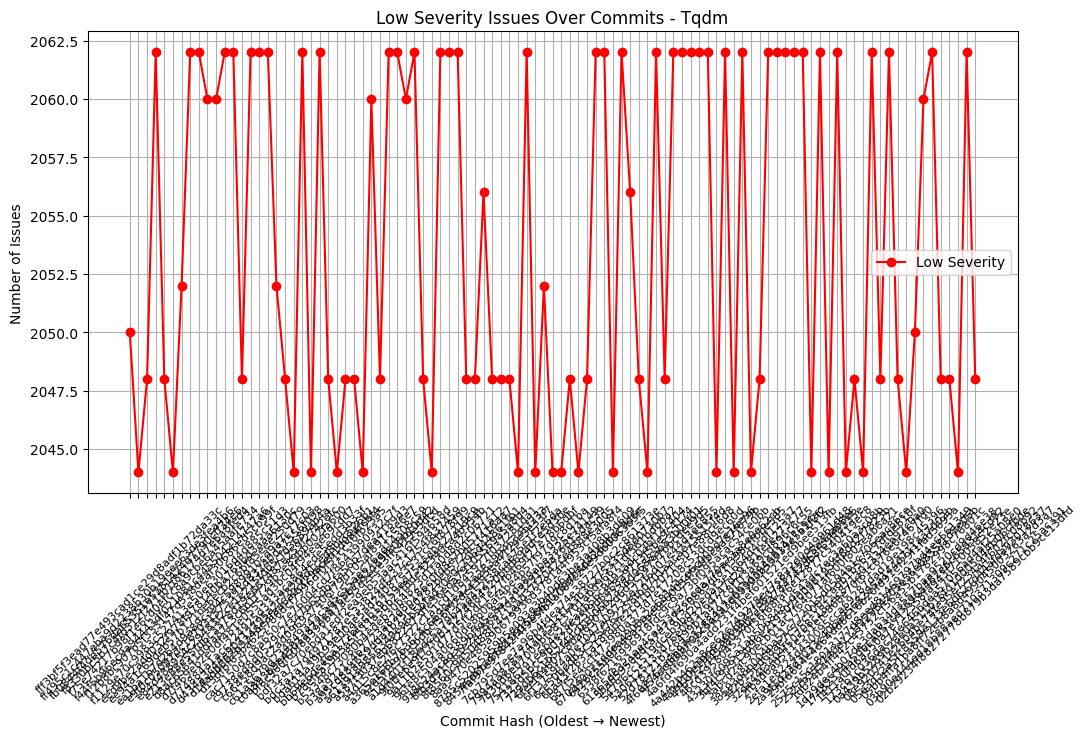

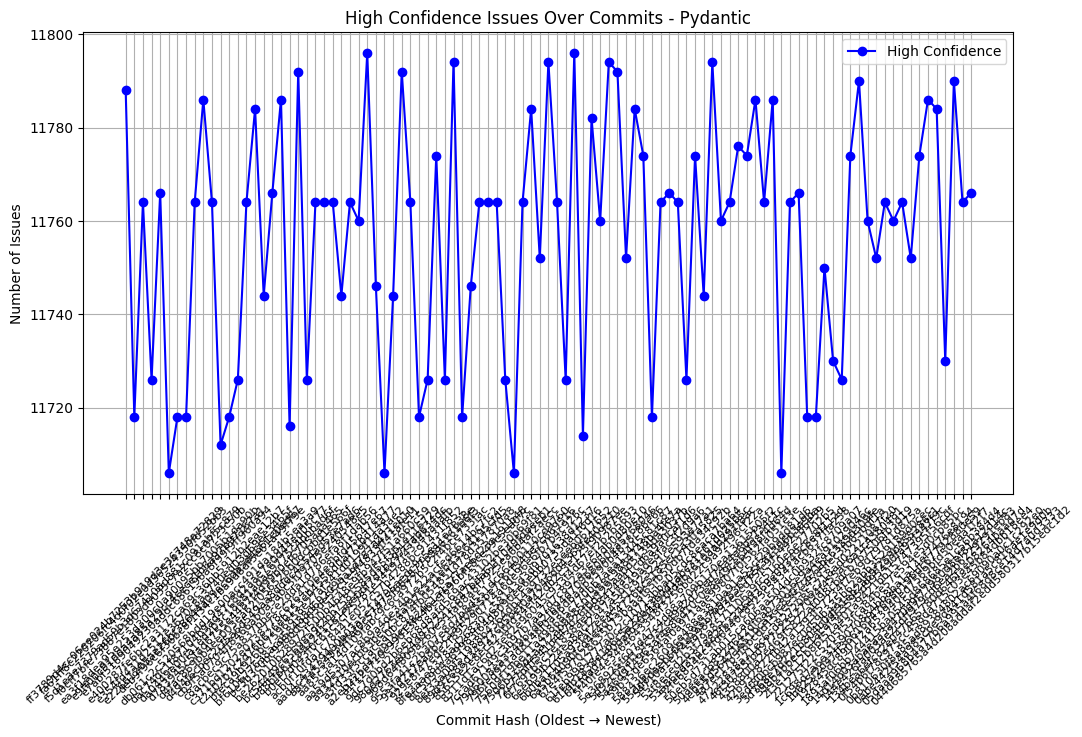

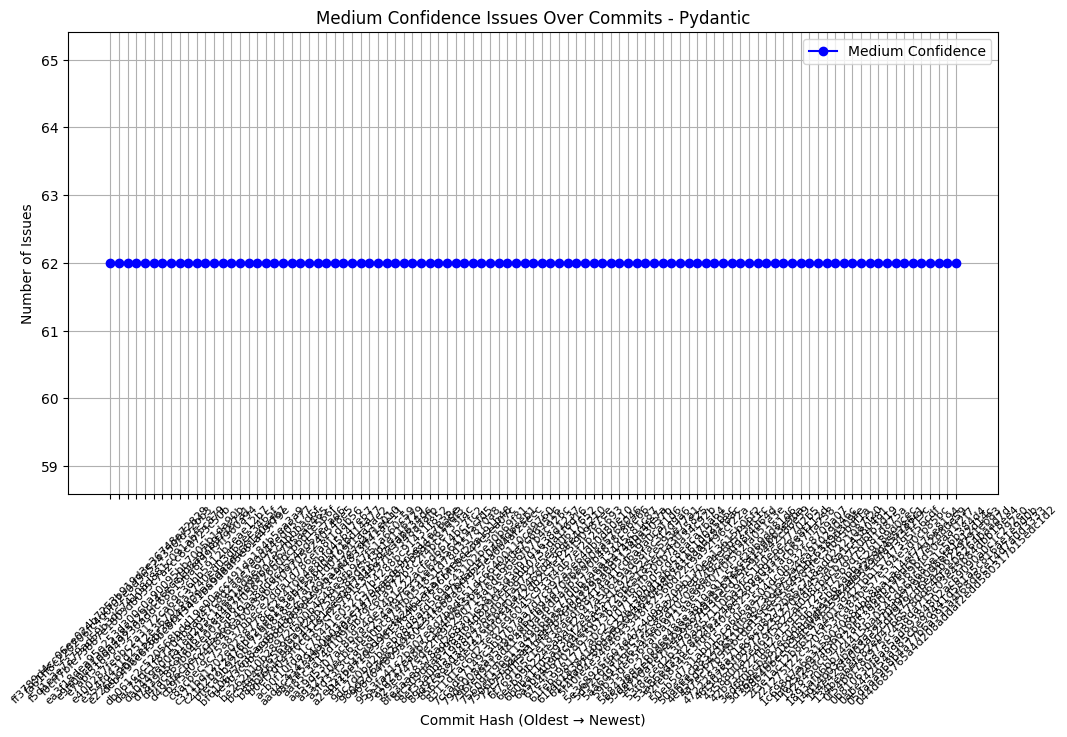

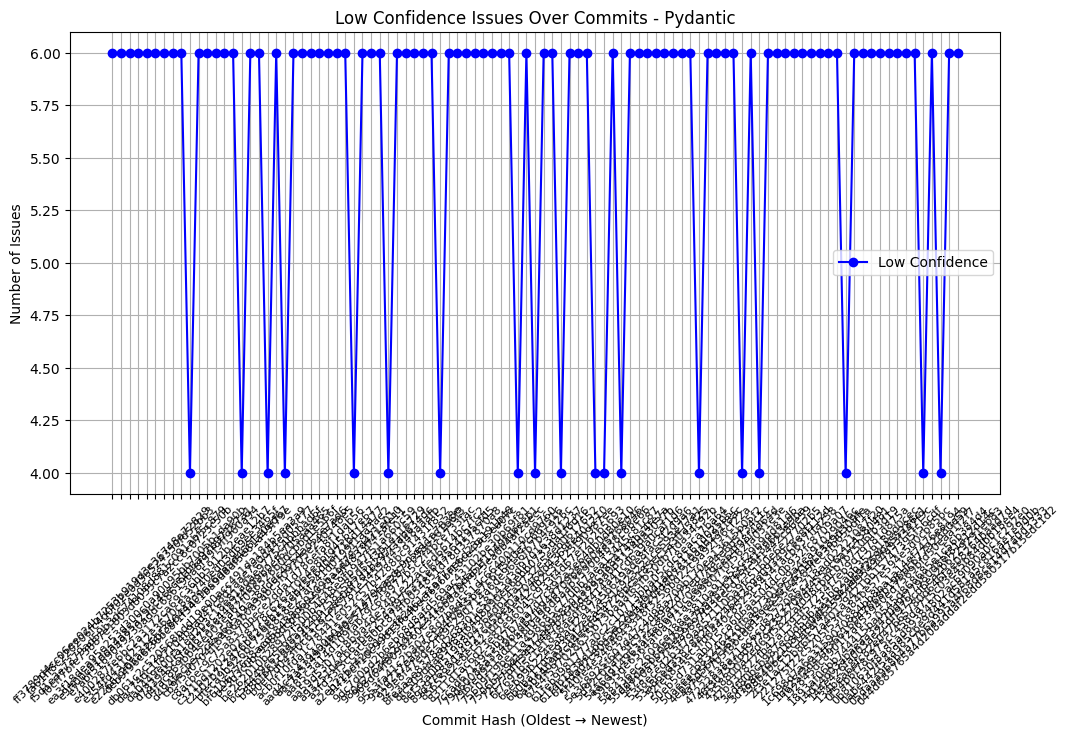

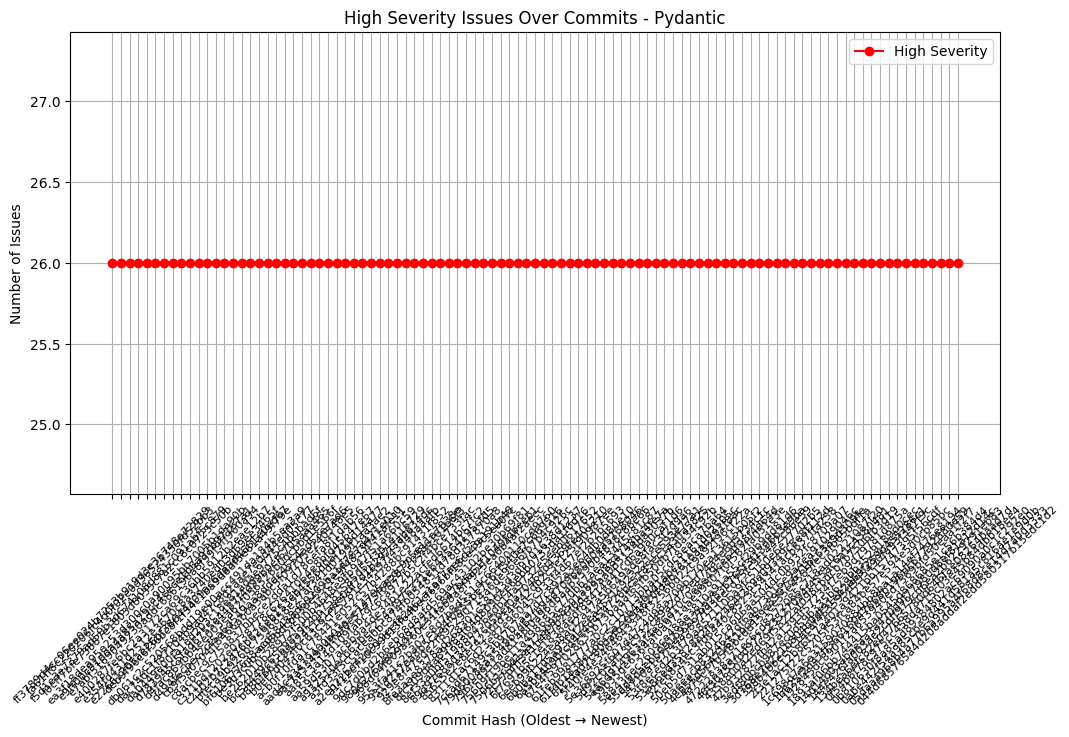

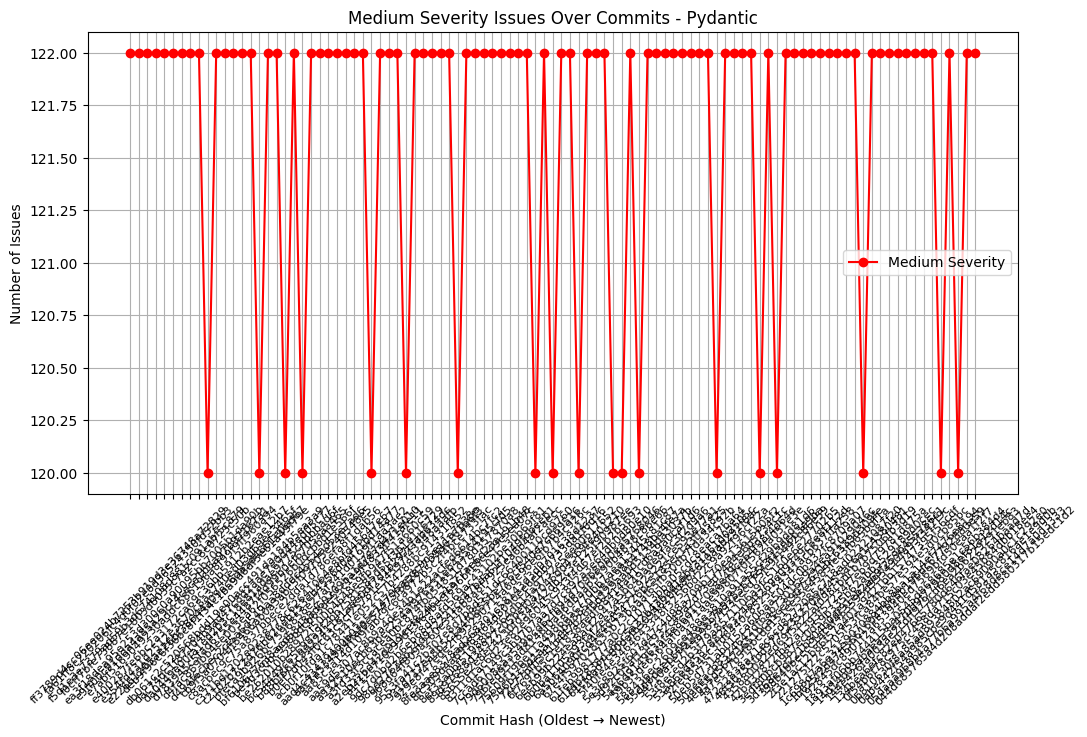

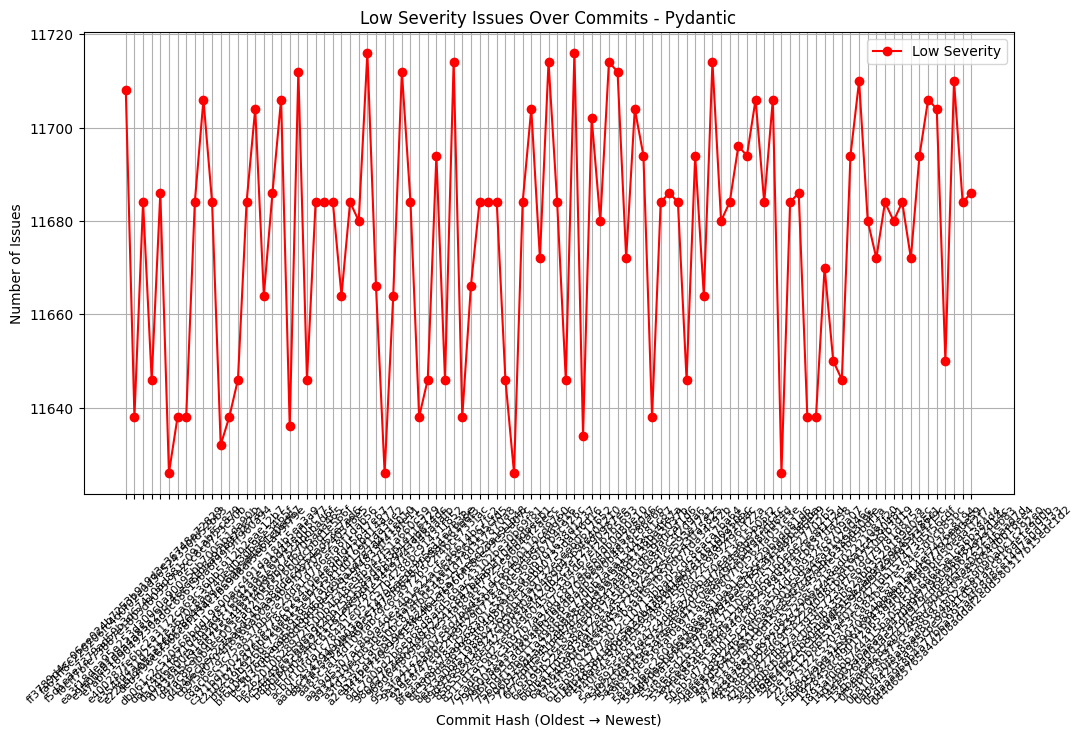

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
bandit_summary_df = pd.read_csv("bandit_summary.csv")

# Get list of repositories
repositories = ["seaborn", "tqdm", "pydantic"]

# Define confidence and severity columns
confidence_levels = ["High Confidence", "Medium Confidence", "Low Confidence"]
severity_levels = ["High Severity", "Medium Severity", "Low Severity"]

# Generate plots for each repository
for repo in repositories:
    repo_df = bandit_summary_df[bandit_summary_df["Repository"] == repo]

    # Reverse commit order to make it Oldest → Newest
    repo_df = repo_df[::-1]

    # Confidence issue plots
    for confidence in confidence_levels:
        plt.figure(figsize=(12, 6))
        plt.plot(repo_df["Commit"], repo_df[confidence], marker="o", linestyle="-", label=confidence, color="blue")
        plt.xlabel("Commit Hash (Oldest → Newest)")
        plt.ylabel("Number of Issues")
        plt.title(f"{confidence} Issues Over Commits - {repo.capitalize()}")
        plt.xticks(rotation=45, fontsize=8)  # Rotate for better readability
        plt.legend()
        plt.grid(True)
        plt.show()

    # Severity issue plots
    for severity in severity_levels:
        plt.figure(figsize=(12, 6))
        plt.plot(repo_df["Commit"], repo_df[severity], marker="o", linestyle="-", label=severity, color="red")
        plt.xlabel("Commit Hash (Oldest → Newest)")
        plt.ylabel("Number of Issues")
        plt.title(f"{severity} Issues Over Commits - {repo.capitalize()}")
        plt.xticks(rotation=45, fontsize=8)  # Rotate for better readability
        plt.legend()
        plt.grid(True)
        plt.show()


C:\Users\Pratham Sharda\AppData\Local\Temp\ipykernel_1980\513123317.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Occurrences", y="CWE ID", data=top_cwes_df, palette="Reds_r")


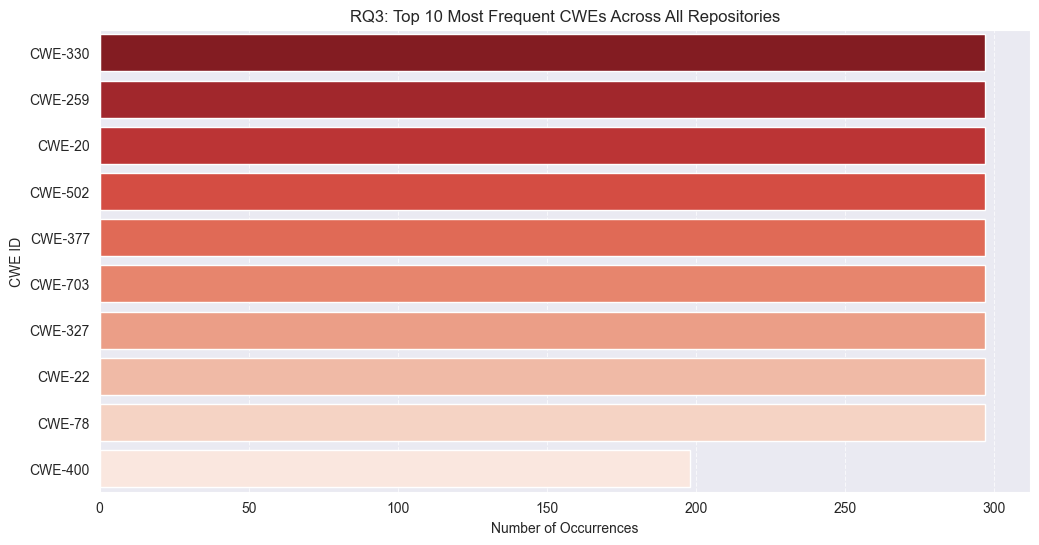

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
bandit_summary_df = pd.read_csv("bandit_summary.csv")

# Convert commit timestamps to datetime if available
if "Commit Timestamp" in bandit_summary_df.columns:
    bandit_summary_df["Commit Timestamp"] = pd.to_datetime(bandit_summary_df["Commit Timestamp"])

# Set visualization style
sns.set_style("darkgrid")

# ✅ RQ1: High Severity Introduction & Fixing Over Time

# bandit_summary_df["High Severity Introduced"] = bandit_summary_df["High Severity"].diff().clip(lower=0)
# bandit_summary_df["High Severity Fixed"] = -bandit_summary_df["High Severity"].diff().clip(upper=0)

# plt.figure(figsize=(12, 6))
# plt.plot(bandit_summary_df["Commit"], bandit_summary_df["High Severity Introduced"], linestyle="--", marker="o", color="red", label="High Severity Introduced")
# plt.plot(bandit_summary_df["Commit"], bandit_summary_df["High Severity Fixed"], linestyle="-", marker="s", color="green", label="High Severity Fixed")

# plt.xlabel("Commit (Oldest → Newest)")
# plt.ylabel("Number of High Severity Issues")
# plt.title("RQ1: Introduction vs Fixing of High Severity Issues Across All Repositories")
# plt.legend()
# plt.xticks(rotation=45, fontsize=8)
# plt.grid(True, linestyle="--", alpha=0.7)
# # plt.show()

# # ✅ RQ2: Severity Patterns (Stacked Area Chart)

# severity_trends_df = bandit_summary_df.groupby("Commit")[["High Severity", "Medium Severity", "Low Severity"]].sum()

# plt.figure(figsize=(12, 6))
# plt.stackplot(severity_trends_df.index, severity_trends_df["High Severity"], severity_trends_df["Medium Severity"], severity_trends_df["Low Severity"],
#               labels=["High Severity", "Medium Severity", "Low Severity"], colors=["red", "orange", "blue"], alpha=0.6)

# plt.xlabel("Commit (Oldest → Newest)")
# plt.ylabel("Number of Issues")
# plt.title("RQ2: Trends of Different Severity Levels Across All Repositories")
# plt.legend()
# plt.xticks(rotation=45, fontsize=8)
# plt.grid(True, linestyle="--", alpha=0.7)
# # plt.show()

# ✅ RQ3: Most Frequent CWEs (Overall Bar Chart)

cwe_counts = {}
for cwe_list in bandit_summary_df["Unique CWEs"]:
    if isinstance(cwe_list, str):
        for cwe in cwe_list.split(", "):
            cwe_counts[cwe] = cwe_counts.get(cwe, 0) + 1

top_cwes = sorted(cwe_counts.items(), key=lambda x: x[1], reverse=True)[:10]

top_cwes_df = pd.DataFrame(top_cwes, columns=["CWE ID", "Occurrences"])

plt.figure(figsize=(12, 6))
sns.barplot(x="Occurrences", y="CWE ID", data=top_cwes_df, palette="Reds_r")

plt.xlabel("Number of Occurrences")
plt.ylabel("CWE ID")
plt.title("RQ3: Top 10 Most Frequent CWEs Across All Repositories")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
# Create 9 separate plots for severity levels across the 3 repositories
fig, axes = plt.subplots(3, 3, figsize=(18, 15), sharex=True)

# Titles for subplots
severity_levels = ["High Severity", "Medium Severity", "Low Severity"]
repos = [("Seaborn", seaborn_df), ("Pydantic", pydantic_df), ("Tqdm", tqdm_df)]
colors = {"High Severity": "red", "Medium Severity": "orange", "Low Severity": "green"}

# Generate plots
for row, (repo_name, repo_df) in enumerate(repos):
    for col, severity in enumerate(severity_levels):
        axes[row, col].plot(repo_df.index, repo_df[severity], marker='o', linestyle='-', color=colors[severity], alpha=0.7)
        axes[row, col].set_title(f"{severity} - {repo_name}")
        axes[row, col].set_ylabel("Vulnerability Count")
        axes[row, col].grid(True)

# Set shared X label
for ax in axes[-1, :]:
    ax.set_xlabel("Commit Index (Repository-Specific)")

plt.tight_layout()
plt.show()
